<a href="https://colab.research.google.com/github/Haarini/Cats-and-Dogs-Classifier-/blob/master/Cats_and_Dogs_classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries and the cats and dogs dataset

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import logging 
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)






68608000/68606236 [==============================] - 1s 0us/step


In [3]:
zip_dir_base=os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


Dividing the cats and dogs images into proper validation and test set

In [0]:
base_dir=os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [21]:
cats_tr=len(os.listdir(train_cats_dir))
dogs_tr=len(os.listdir(train_dogs_dir))
cats_val=len(os.listdir(validation_cats_dir))
dogs_val=len(os.listdir(validation_dogs_dir))
total_cats=cats_tr + cats_val
total_dogs=dogs_tr + dogs_val
total_train=cats_tr + dogs_tr
total_val=cats_val  +dogs_val
print('Total number of cats training images',cats_tr)
print('Total number of cats validation images',cats_val)
print('Total number of cat images',total_cats)
print('Total number of dog images',total_dogs)
print('Total number of dogs training images',dogs_tr)
print('Total number of dogs validation images',dogs_val)
print('Total training images',total_train)
print('Total validation images',total_val)

Total number of cats training images 1000
Total number of cats validation images 500
Total number of cat images 1500
Total number of dog images 1500
Total number of dogs training images 1000
Total number of dogs validation images 500
Total training images 2000
Total validation images 1000


Defining a data generator that rescales the coefficients of the images with (1./255)

In [0]:
batchsize=100
imgshape=150

In [0]:
train_image_generator=ImageDataGenerator(rescale=1./255)
validation_image_generator=ImageDataGenerator(rescale=1./255)

In [7]:
train_data_gen=train_image_generator.flow_from_directory(batch_size=batchsize,
                                                         directory=train_dir,
                                                         shuffle=True,
                                                         target_size=(imgshape,imgshape),
                                                         class_mode='binary')

Found 2000 images belonging to 2 classes.


In [9]:
val_data_gen=validation_image_generator.flow_from_directory(batch_size=batchsize,
                                                            directory=validation_dir,
                                                            shuffle=False,
                                                            target_size=(imgshape,imgshape),
                                                            class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
sample_training_images,_=next(train_data_gen)
sample_validation_images,_=next(val_data_gen)

In [0]:
def plotimages(images_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

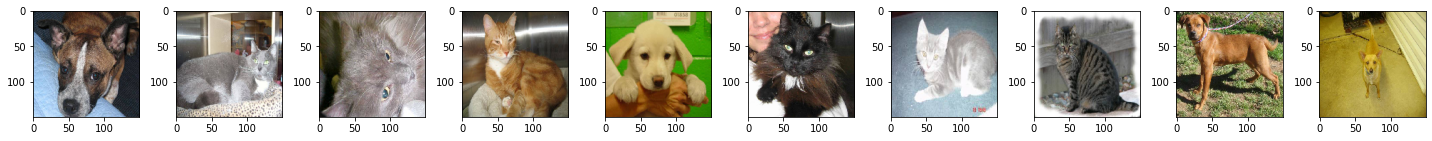

In [12]:
plotimages(sample_training_images[:10])

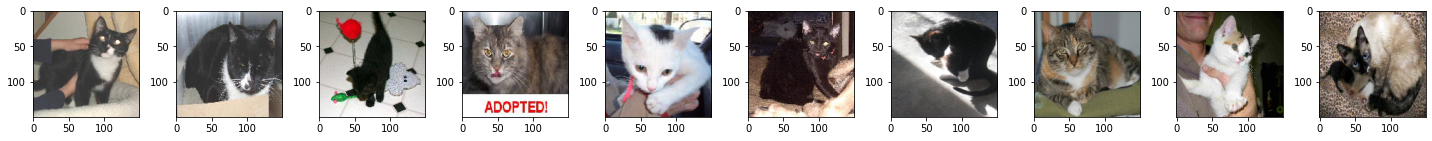

In [13]:
plotimages(sample_validation_images[:10])

In [0]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                                  tf.keras.layers.MaxPooling2D(2,2),

                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),

                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),

                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),

                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(2,activation='softmax')
])

In [0]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [22]:
epoch=100
history=model.fit_generator(train_data_gen,
                            steps_per_epoch=int(np.ceil(total_train/float(batchsize))),
                            epochs=epoch,
                            validation_data=val_data_gen,
                            validation_steps=int(np.ceil(total_val/float(batchsize)))
                            )

Epoch 1/100
20/20 [==============================] - 102s 5s/step - loss: 0.6927 - accuracy: 0.5225 - val_loss: 0.6795 - val_accuracy: 0.6260
Epoch 2/100
20/20 [==============================] - 103s 5s/step - loss: 0.6555 - accuracy: 0.6105 - val_loss: 0.6729 - val_accuracy: 0.5780
Epoch 3/100
20/20 [==============================] - 103s 5s/step - loss: 0.6416 - accuracy: 0.6445 - val_loss: 0.6160 - val_accuracy: 0.6720
Epoch 4/100
20/20 [==============================] - 102s 5s/step - loss: 0.5949 - accuracy: 0.6890 - val_loss: 0.6029 - val_accuracy: 0.6870
Epoch 5/100
20/20 [==============================] - 102s 5s/step - loss: 0.5661 - accuracy: 0.7335 - val_loss: 0.5879 - val_accuracy: 0.6930
Epoch 6/100
20/20 [==============================] - 102s 5s/step - loss: 0.5500 - accuracy: 0.7520 - val_loss: 0.6194 - val_accuracy: 0.6760
Epoch 7/100
20/20 [==============================] - 102s 5s/step - loss: 0.5501 - accuracy: 0.7435 - val_loss: 0.5790 - val_accuracy: 0.7150
Epoch 

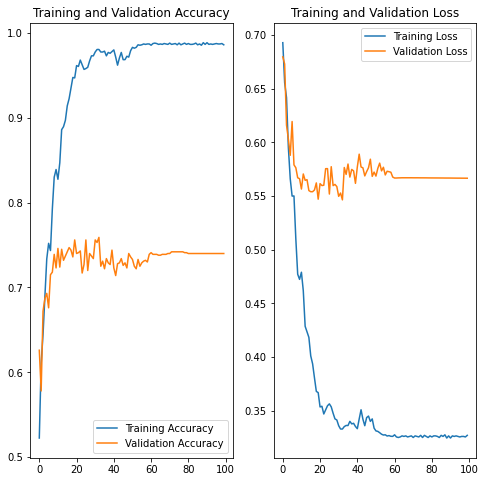

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



For 100 epochs, the trained model has achived a validation accuracy of 74% and training accuracy of 98.60%.

Thus from the above plots we can infer that the training and validation accuracy of the developed model completely depend upon the epochs the model is trained with .
